In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

import asymNdimPdf as apdf
import pandas as pd

def getErrorFromParam(loc, scale, alpha):
    '''
    return cVal -eNeg +ePos measurement from a skewnormal
    distribution.
    '''
    
    sn = apdf.ndimSkewNormal(loc=loc, scale=scale, alpha=alpha)
    mode = sn.mode1D()
    std  = sn.std1D()
    
    def beMin(x, CL=0.68):
        eNeg, ePos = x
        cl = sn.interval1D(mode-eNeg, mode+ePos)
        penalty = ( sn.pdf(mode-eNeg) - sn.pdf(mode+ePos) )**2
        return np.abs(cl-CL) + np.abs(penalty)
    
    x0 = [std, std]
    res = optimize.minimize(beMin, x0, tol=1e-3, method='Nelder-Mead')
    eNeg, ePos = res.x
    
    return mode, eNeg, ePos

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [6]:
alphas = np.linspace(-10, 10, 200)
meas   = np.array([getErrorFromParam(0, 1, a) for a in alphas])
#meas2  = np.array([getErrorFromParam(0, 5, a) for a in alphas])

No handles with labels found to put in legend.


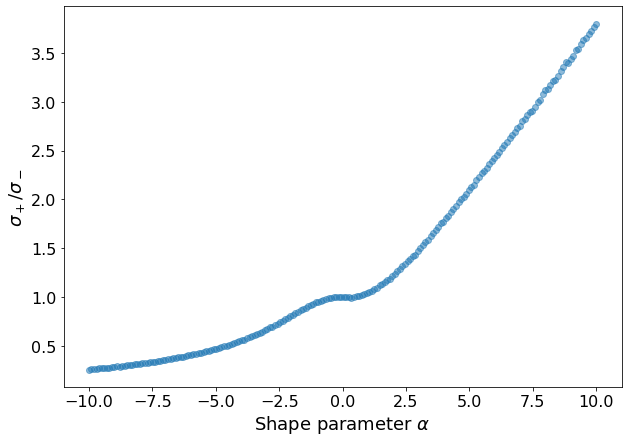

In [7]:
eNeg, ePos   = meas[:, 1], meas[:, 2]
#eNeg2, ePos2 = meas2[:, 1], meas2[:, 2]
plt.plot(alphas, (ePos/eNeg) , 'o', alpha=0.5);
#plt.plot(alphas, (ePos2/eNeg2), 'o', label='s=5', alpha=0.5);
plt.xlabel('Shape parameter $\\alpha$')
plt.ylabel('$\\sigma_+ / \\sigma_-$')
plt.legend();

No handles with labels found to put in legend.


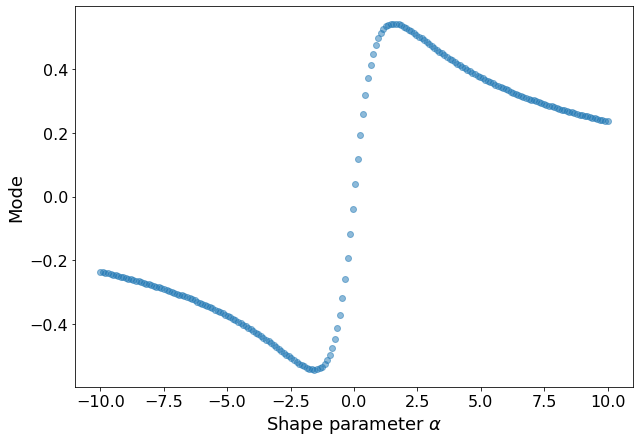

In [12]:
plt.plot(alphas, meas[:, 0], 'o', alpha=0.5);
#plt.plot(alphas, meas2[:, 0]/5, 'o', label='s=5', alpha=0.5);
plt.xlabel('Shape parameter $\\alpha$')
plt.ylabel('Mode')
plt.legend();

In [ ]:
N = 10000
alphas = np.concatenate([
    np.linspace(-18, -2, N),
    np.linspace( -2,  0, N),
    np.linspace(  0,  2, N),
    np.linspace(  2, 18, N),
])
print(alphas)
meas = np.array([getErrorFromParam(0, 1, a) for a in alphas])

[-18.         -17.99839984 -17.99679968 ...  17.99679968  17.99839984
  18.        ]
